In [3]:
cd /content/drive/My\ Drive/Whatsapp\ Chat\ Analysis/

/content/drive/.shortcut-targets-by-id/1ymUvpbcyy9XxHjLxlR6sWaTwc-lXXR-I/Whatsapp Chat Analysis


In [4]:
 pip install emoji --upgrade

     |████████████████████████████████| 51kB 1.4MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49714 sha256=78227fefc98233aba6e752883fa86135d0efc9f5cd02c8397811e03014812f72
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [5]:
import re
import pandas as pd
import numpy as np

import os
import pandas as pd
pd.set_option('display.max_rows', 500)

import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import re

from collections import Counter

import string
import emoji

import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
def read(file):
    f = open('/content/drive/My Drive/Whatsapp Chat Analysis/{}'.format(file), 'r') 
    messages = re.findall('(\d+/\d+/\d+, \d+:\d+\d+ ([\w]+)) - (.*?): (.*)', f.read())
    f.close()
    hist = pd.DataFrame(messages,columns=['date','am-pm','name','msg'])
    hist['date'] = pd.to_datetime(hist['date'],format="%d/%m/%y, %I:%M %p")
    hist['msg_len'] = hist['msg'].str.len()
    hist['date1'] = hist['date'].apply(lambda x: x.date())
    return hist

In [7]:
files = os.listdir('/content/drive/My Drive/Whatsapp Chat Analysis')
lst = []
for file in files:
    history = read(file)
    lst.append(history)    
history = pd.concat(lst).reset_index()     

In [9]:
history.head(2)

,index,date,am-pm,name,msg,msg_len,date1
0,0,2019-09-26 21:20:00,pm,sachin,Helo,4,2019-09-26
1,1,2019-09-26 21:20:00,pm,Diwakar Awaaz 1,I m 💀,5,2019-09-26


In [18]:
history_clean = history[history['msg']!=' <Media omitted>']

In [20]:
history_clean[history_clean['name']=='sachin']['msg'].count()

58006

In [21]:
history_clean['name'].nunique() 

379

In [25]:
# Create a subset of the dataframe with only messages i've sent
msg_sachin = (history_clean[history_clean['name']=='sachin'])

In [33]:
msg_sachin.shape

,index,date,am-pm,name,msg,msg_len,date1,day,datehour
0,0,2019-09-26 21:20:00,pm,sachin,Helo,4,2019-09-26,Thursday,21
5,5,2019-09-26 21:23:00,pm,sachin,<Media omitted>,15,2019-09-26,Thursday,21
7,7,2019-09-26 21:24:00,pm,sachin,Nah,3,2019-09-26,Thursday,21
8,8,2019-09-26 21:24:00,pm,sachin,I'm fine,8,2019-09-26,Thursday,21
10,10,2019-09-26 21:59:00,pm,sachin,Where are you?,14,2019-09-26,Thursday,21
...,...,...,...,...,...,...,...,...,...
189214,202,2019-07-28 15:23:00,pm,sachin,Order krna tha,14,2019-07-28,Sunday,15
189215,203,2019-07-28 15:23:00,pm,sachin,Kr liya,7,2019-07-28,Sunday,15
189221,209,2020-02-27 10:14:00,am,sachin,Acha,4,2020-02-27,Thursday,10
189222,210,2020-02-27 10:14:00,am,sachin,Okay,4,2020-02-27,Thursday,10


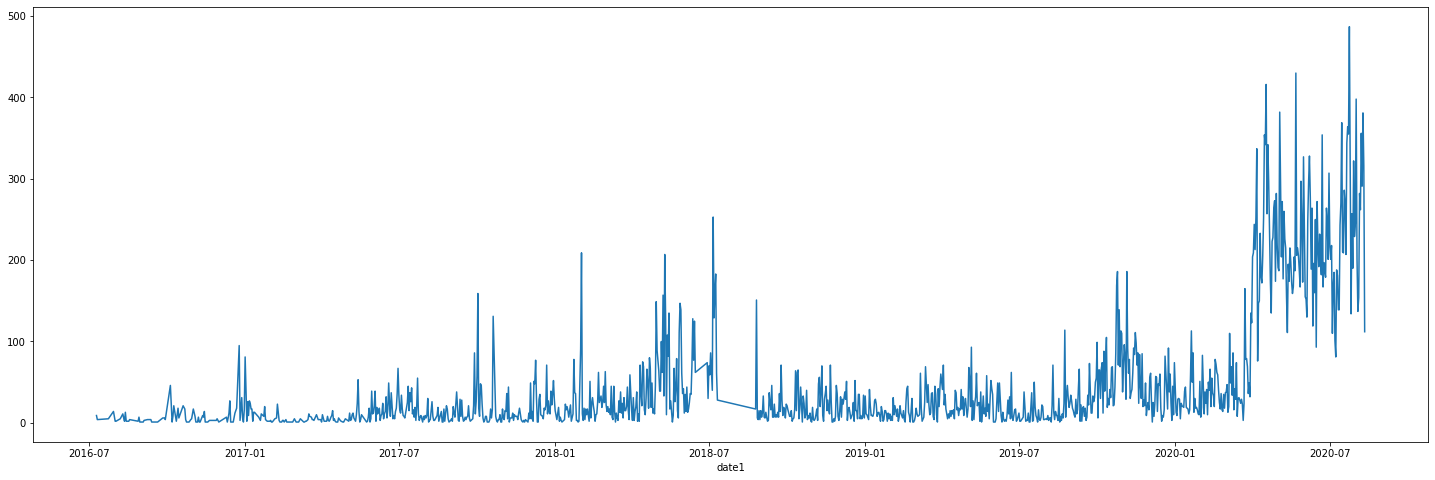

In [31]:
# Plot
plt.figure(figsize=(25,8))
msg_sachin.groupby(['date1']).count()['msg'].plot()

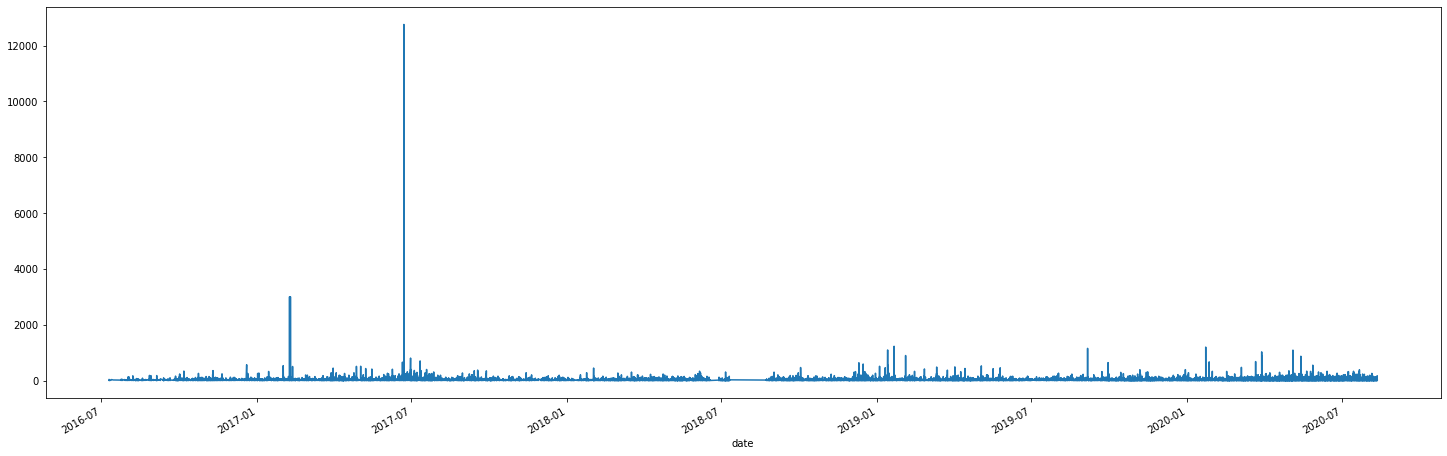

In [32]:
plt.figure(figsize=(25,8))
history.groupby(['date'])['msg_len'].mean().plot()

In [65]:
history_clean[history_clean['msg_len'] == history_clean['msg_len'].max()]['msg'].values

array(['*Special Offer for all Jio Customers*  *Activate Jio Prime Membership Free For Today Only* *Otherwise you have to pay Rs99 and Rs 301.*  *So ACTIVATE JIO PRIME MEMBERSHIP FREE*  Jio Team. Link - http://Jio-Prime-Activation.ml/?Free\'],\\n"," [\'22/06/17\', \'12:39 pm\', \'sachin\', \'<Media omitted>\'],\\n"," [\'22/06/17\', \'12:40 pm\', \'sachin\', \'HS = Economics\'],\\n"," [\'22/06/17\', \'12:42 pm\', \'sachin\', \'1st phase ka placement data hai\'],\\n"," [\'22/06/17\', \'12:57 pm\', \'sachin\', \'Finance consulting hai\'],\\n"," [\'22/06/17\', \'12:57 pm\', \'sachin\', \'Risk management etc\'],\\n"," [\'22/06/17\', \'12:57 pm\', \'sachin\', \'Coding ka koi use nii😅\'],\\n"," [\'22/06/17\',\\n","  \'12:58 pm\',\\n","  \'Bittu mama\',\\n","  \'👍🏻👍🏻 22/06/17, 3:19 pm - sachin: Apke pass DSLR hai kya? 22/06/17, 3:35 pm - Bittu mama: 🙃 22/06/17, 3:37 pm - sachin: Bada wala lens hai 22/06/17, 3:38 pm - Bittu mama: 🙁 22/06/17, 3:38 pm - sachin: 👍🏻\'],\\n"," [\'05/07/17\',\\n","  

In [27]:
msg_sachin['day'] = msg_sachin['date'].dt.day_name()
msg_sachin['day'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Friday       8965
Sunday       8918
Monday       8634
Wednesday    8156
Thursday     8082
Saturday     7684
Tuesday      7567
Name: day, dtype: int64

In [28]:
msg_sachin['datehour'] = msg_sachin['date'].dt.hour
msg_sachin['datehour'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


21    4624
22    4463
19    4197
12    4140
18    3922
17    3864
11    3724
14    3465
20    3457
16    3289
13    3194
10    2930
15    2695
23    2511
9     2439
8     1495
0     1386
7      922
6      392
1      363
2      214
5      169
3      101
4       50
Name: datehour, dtype: int64

In [34]:
msg_sachin['month'] = msg_sachin['date'].dt.month
msg_sachin['month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5     9953
7     9122
4     8874
6     8269
8     3958
10    3420
3     2980
11    2831
12    2665
2     2273
1     2007
9     1654
Name: month, dtype: int64

In [35]:
# Counting number of emojis
def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

def Count_Emojis(df):
    series = df['msg']
    all_words = ""
    for sentence in series:
        all_words += extract_emojis(sentence)
    word_count = Counter(all_words)
    
    
    ordered = {}
    ordered['msg'] = []
    for key, number in word_count.most_common()[:50]:
        ordered[key] = []
    
    for sentence in series:
        sentence_count = Counter(extract_emojis(sentence))
        
        for word in ordered:
            count = sentence_count[word] if sentence_count[word] else 0
            ordered[word] += [count]
    ordered['msg'] = list(series)
    ordered['date'] = list(df['date'])
    ordered['date1'] = list(df['date1'])
    ordered['name'] = list(df['name'])
    return pd.DataFrame(ordered)

In [37]:
emojis_counts = Count_Emojis(history_clean)

In [43]:
emojis_counts.head(1)

,msg,😂,💣,🤣,🏻,🙉,😅,👍,♀,🙄,👌,♂,😆,❤,🐒,🤷,😬,🙏,😍,😛,🤦,👏,😯,😘,🤔,😊,😭,💆,😒,🙊,🐠,🐋,🐟,😁,🤭,😢,🙋,😝,🔥,😜,🤤,🌝,🎂,😑,🥵,👋,🤢,🤨,😏,🧟,🌚,date,date1,name
0,Helo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-09-26 21:20:00,2019-09-26,sachin


In [78]:
emojis_counts.sum()

msg     *Special Offer for all Jio Customers*  *Activa...
😂                                                   10809
💣                                                    5943
🤣                                                    5608
🏻                                                    5482
🙉                                                    4717
😅                                                    3714
👍                                                    2588
♀                                                    2439
🙄                                                    1600
👌                                                    1477
♂                                                    1379
😆                                                    1352
❤                                                    1185
🐒                                                    1147
🤷                                                    1120
😬                                                    1090
🙏             